<center><h1 style="font-size:40px;">Project 2<br> GANs
</h1></center>

This project will develop an **Generative adversarial network (GAN)**. The task is to use an unsupervised approach to generate realistic images, To achieve this GAN uses two networks: generator and discriminator.

The generator tries to fool the discriminator and create realistic images. The discriminators job is to figure out if the image is real or fake. A GAN network is very suitable when there is no clear pattern or we want to "create" new data samples. A good generator can create new and realistic images from images.

This can according to google crash course summarise as:
* The generator learns to generate plausible data. The generated instances become negative training examples for the discriminator.
* The discriminator learns to distinguish the generator's fake data from real data. The discriminator penalizes the generator for producing implausible results.

The setup is further visualised below for the generator and discriminator provided from [google crash course](https://developers.google.com/machine-learning/gan/gan_structure):
<center><img src="../../data/images/gan_diagram.svg" width="600"></center
    
All **tasks** include **TODO's** thare are expected to be done before the deadline. The highlighted **Question's** should be answered in the report. Keep the answers separated so it is easy to read for the grading. Some sections include asserts or an expected result to give a and expected results are given. Some sections does not contain any **TODO's** but is good to understand them. 

For the **report** we have prepared an *Report.ipynb* notebook. The report should act as a summary of your findings and motivate your choice of approach. A better motivation show your understanding of the lab. Dont forget to include all **parts** in the report!

This lab logs metrics to **Tensorboard**, for instructions to install check the introduction pdf.

Good luck!

---

# Task

**TODO:** Implement a genenerator architecture

**TODO:** Implement a discriminator architecture

**TODO:** Train the GAN network so the discriminator cant distinguish the generator's fake data from real data.

**TODO:** Select a good metric to evaluate the models performance and argue why the metric give a good overview of the performance.

**Question:** Explain in the report what you did and why. Present a pipeline of the code. 

--- 

**Note:** The current image resolution is set to 32x32 (i.e. IMAGE_WIDTH and IMAGE_HEIGHT) in config.py. 
This way initial experiements can run faster. Once you implement the inital version of the network, please set the resolution values back to 128x128. Experimental results should be provided for this high resolution images.  

**Hint:** As a generator model, you can use the segmentation model implemented in lab03. Do not forget to adapt the input and output shapes of the generator model in this case.




# Import packages

In [1]:
%load_ext autoreload
%autoreload 2
# Hacky solution to ac>cess the global utils package
import sys,os
sys.path.append(os.path.dirname(os.path.realpath('..')))

In [2]:
from config import LabConfig
import torchmetrics
import transforms as T
import torchvision
import torch
from torch.utils.data import DataLoader
from utils.dataset import LastFramePredictorDataset
from utils.plot import GAN
from utils.utils import normalize
import torchvision.datasets as dset
import torchvision.transforms as transforms

## Load config
Note that this lab does not support for fineGrained dataset.

In [3]:
cfg = LabConfig()
cfg.todict()

{'training_img_dir': '../../data/celebA',
 'validation_img_dir': '../data/FlyingObjectDataset_10K/validation',
 'testing_img_dir': '../data/FlyingObjectDataset_10K/testing',
 'SEED': 420,
 'GPU': -1,
 'IMAGE_WIDTH': 128,
 'IMAGE_HEIGHT': 128,
 'IMAGE_CHANNEL': 3,
 'NUM_WORKERS': 4,
 'BATCH_SIZE': 32,
 'TENSORBORD_DIR': 'logs/'}

# Dataset
First load the dataloaders for three datasets; train, validation and test. Feel free to test different augmentations, more can be found at [pytorch docs](https://pytorch.org/vision/stable/transforms.html)

The dataset consist of images defined as real images. The fake images are created with the generator. For training we can use 50%/50% of real and fake images to train the discriminator. In other words, every other image is a generated (fake) image from the generator. Feel free to experiment what type of input to use for the generator to create a fake image. 

**Example:** The generator should **NOT** take a real image as input but could take a grayscale image if the task is to color images.

## Augmentation
To ensure that each image have the same shape we pad the dataset. It is possible to resize the images but then the bounding boxes also have to be transformed to correct shape which is not covered in this project! 

In [4]:
train_transform = transforms.Compose([
        transforms.Resize((cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH)),
        transforms.CenterCrop((cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH)),
        #transforms.Lambda(lambda x: normalize(x)),
        transforms.ToTensor(),
        
        
    ])

train_transform_grayscale = transforms.Compose([
        transforms.Resize((cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH)),
        transforms.CenterCrop((cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH)),
        transforms.Grayscale(num_output_channels=1),
        transforms.Lambda(lambda x: normalize(x),
        transforms.ToTensor())
    ])

## Dataloader

In [5]:
# Create the dataloader
dataloader = torch.utils.data.DataLoader(
    dset.ImageFolder(
        root=cfg.training_img_dir,
        transform=train_transform
    ), 
    batch_size=cfg.BATCH_SIZE,
    shuffle=True, 
    num_workers=cfg.NUM_WORKERS
)

# Create the dataloader
dataloader_grayscale = torch.utils.data.DataLoader(
    dset.ImageFolder(
        root=cfg.training_img_dir,
        transform=train_transform_grayscale
    ), 
    batch_size=cfg.BATCH_SIZE,
    shuffle=True, 
    num_workers=cfg.NUM_WORKERS
)

## Visualise data
To get an idea of the dataset we will first plot the data. This is very important, especially if we perform data augmentation. If the implementation is wrong an qualitative estimation will with a great probability tell if something is wrong.

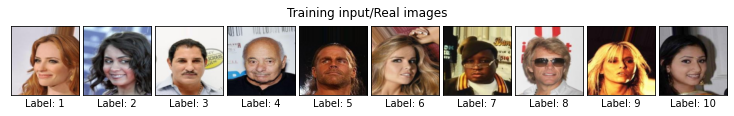

In [6]:
t_x, t_y = next(iter(dataloader))
GAN.data(t_x, nrows=1)

In [7]:
t_x, t_y = next(iter(dataloader_grayscale))
GAN.data(t_x, nrows=1)

PicklingError: Can't pickle <function <lambda> at 0x00000210BDAAF550>: attribute lookup <lambda> on __main__ failed

In [1]:
t_x.min()

NameError: name 't_x' is not defined

# Implementation

---

**HINT:** Train discriminator on real images $D(x)$, then train generator $D(G(z))$ where z is a distribution or image. 